In [4]:
using NLsolve
configFile = "config.toml"
include("src/ladderDGA_Julia.jl")

calculate_Σ_ladder (generic function with 1 method)

In [10]:
include("src/ladderDGATools.jl")
modelParams, simParams, env, Γsp, Γch, GImp, Σ_loc, FUpDo, χLocsp, χLocch, usable_loc_sp, usable_loc_ch = setup_LDGA(configFile, false);
kIndices, kGrid = gen_kGrid(simParams.Nk, modelParams.D);
ϵkGrid          = squareLattice_ekGrid(kGrid);
qIndices, qGrid = reduce_kGrid.(cut_mirror.((kIndices, kGrid)));
qMultiplicity   = kGrid_multiplicity(qIndices);
Σ_loc2 = store_symm_f(Σ_loc,-simParams.n_iω:(simParams.n_iν+simParams.n_iω-1));
GLoc = Gfft_from_Σ(Σ_loc2, ϵkGrid, -simParams.n_iω:(simParams.n_iν+simParams.n_iω-1), modelParams);
GImpSym = store_symm_f(GImp,-simParams.n_iω:(simParams.n_iν+simParams.n_iω-1));
@time bubble = calc_bubble_fft(GLoc, length(qIndices), modelParams, simParams);

[ Info: Reading Fortran Input, this can take several minutes.
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could

Writing HDF5 (vars.jdl) and Fortran (fortran_out/) output.


[ Info: Done Reading chi
┌ Info: loading from 
└   env.inputVars = "vars.jld"
┌ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
└ @ Main ~/Hamburg/ladderDGA_Julia/src/helpers.jl:172


  0.197201 seconds (130.72 k allocations: 6.203 MiB)


In [11]:
Σ_loc

19-element Array{Complex{Float64},1}:
 0.9999999999999711 - 0.8771344399154906im
 0.9999999999999765 - 0.7915119805688808im
 0.9999999999999799 - 0.6387037774071997im
 0.9999999999999802 - 0.5250650622910511im
 0.9999999999999818 - 0.442046472408673im
  0.999999999999981 - 0.3797344037743282im
 0.9999999999999811 - 0.331725225221283im
 0.9999999999999816 - 0.2938613395340193im
 0.9999999999999803 - 0.2633764735208053im
 0.9999999999999818 - 0.23838542899926374im
 0.9999999999999826 - 0.2175729785464373im
  0.999999999999982 - 0.20000065238535303im
 0.9999999999999821 - 0.18498453476357124im
 0.9999999999999826 - 0.17201643271206546im
 0.9999999999999803 - 0.16071196611661964im
 0.9999999999999821 - 0.15077567938770908im
 0.9999999999999799 - 0.1419771250934314im
  0.999999999999983 - 0.13413416047153248im
 0.9999999999999812 - 0.12710107692358097im

In [8]:
bubble[1,:,1]

10-element Array{Complex{Float64},1}:
  -26.03141157293609 - 9.489215707532968e-13im
 -23.214828379171177 - 9.047315739980252e-13im
 -21.603825624206465 - 8.910985157585765e-13im
 -20.321523625417377 - 8.883084305048506e-13im
  -21.60382562420646 - 8.907626233697309e-13im
 -20.321523625417377 - 8.883427523170761e-13im
  -19.44239522100317 - 9.051653303635809e-13im
 -19.442395221003167 - 9.052322967116948e-13im
  -18.72738628455131 - 9.351988857575158e-13im
  -18.50805453121494 - 1.0156996896172585e-12im

In [9]:
bubble, χsp, χsp_λ, χch, usable_sp, usable_ch, trilexsp, trilexch, Σ_ladder, Σ_ladderCorrected = calculate_Σ_ladder(configFile);

[ Info: Reading Inputs...
[ Info: Reading Fortran Input, this can take several minutes.
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warning:    ---> Warning!! Could not find fixed column width!
└ @ Main ~/Hamburg/ladderDGA_Julia/src/IO.jl:423
┌ Warnin

Writing HDF5 (vars.jdl) and Fortran (fortran_out/) output.
  0.005332 seconds (9.74 k allocations: 934.609 KiB)


┌ Info: loading from 
└   env.inputVars = "vars.jld"
┌ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
└ @ Main ~/Hamburg/ladderDGA_Julia/src/helpers.jl:172
┌ Info: Inputs Read. Starting Computation.
│ Found usable intervals for local susceptibility of length 
│       sp: 1
│       ch: 1 
└       χLoc_sp = NaN, χLoc_ch = NaN
[ Info: Setting up and calculating k Grid: 
[ Info: Calculating bubble: 


  0.144460 seconds (229.29 k allocations: 11.601 MiB)


[ Info: Calculating χ and γ: 


  1.136164 seconds (1.35 M allocations: 71.367 MiB, 10.58% gc time)


[ Info: TODO: computation of local quantities does not make any sense


  0.148439 seconds (190.14 k allocations: 9.741 MiB)


┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 7:7, length: 1
│ ch: 7:7, length: 1
└ usable: 7:7, length: 1
┌ Info: Using rhs for non tail corrected lambda correction: 
│   rhs = NaN
│    =  = " = "
│   χLocch = NaN + NaN*im
│    +  = " + "
│   χLocsp = NaN + NaN*im
│    -  = " - "
└   χch_sum = NaN + NaN*im
[ Info: Calculating λ correction in the spin channel: 


TODO: lambda tc


┌ Info: found 
│   χ_min = NaN
│   . Looking for roots in intervall  = ". Looking for roots in intervall "
│   int =
│    2-element Array{Float64,1}:
│     NaN
└     NaN


InexactError: InexactError: Int64(NaN)

In [3]:
function cond_Epot(λsp, λch, χsp, χch, trilexsp, trilexch, bubble, GLoc, FUpDo, 
                   Σ_loc, Σ_ladderLoc, ϵkGrid, qIndices, usable_ω, usable_ν, mP, sP)
    χsp_λ = χ_λ(χsp, λsp)
    χch_λ = χ_λ(χch, λch)
    Σ_λ = calc_DΓA_Σ_fft(χsp_λ, χch_λ, trilexsp, trilexch, bubble, GLoc, FUpDo, 
                         ϵkGrid, qIndices, usable_ω, 1:simParams.n_iν, simParams.Nk,
                         modelParams, simParams, simParams.tail_corrected)
    Σ_λ_corrected = Σ_λ .- Σ_ladderLoc .+ Σ_loc[1:length(Σ_ladderLoc)]
    tmp = mapslices(x -> 1 ./ GLoc[1:size(Σ_λ,2)].- x, Σ_λ; dims=[2])
    sum(χch_λ .- χsp_λ) ./ (2*modelParams.β) .- sum(Σ_λ ./ (tmp))
end


    
function construct_f!(F, λ, rhs)#default rhs χLocsp + χLocch or n/2 (1-n/2)
    χsp_λ = χ_λ(rχ_sp, λ[1])
    χch_λ = χ_λ(rχ_ch, λ[2]) 
    tmp =  sum(sum(χch_λ .+ χsp_λ, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.β*sum(qMultiplicity))           
    F[1] = real(tmp - rhs)
end

function construct_f(λsp, λch, χsp, χch, qMultiplicity; rhs=0.5) 
   χch_λ = χ_λ(χch, λch)
   χsp_λ = χ_λ(χsp, λsp)
   tmp =  sum(sum(χch_λ .+ χsp_λ, dims=1)[1,:] .* qMultiplicity) ./ (modelParams.β*sum(qMultiplicity))           
   res1 = tmp - rhs
   return res1
end

construct_f (generic function with 1 method)

In [4]:
usable_ω = intersect(usable_sp, usable_ch);
rχsp = real.(χsp[:,:]);
rχch = real.(χch[:,:]);

In [15]:
bubble[1,:,1]

56-element Array{Complex{Float64},1}:
  0.0001448966788330003 - 2.5482410412711023e-19im
 0.00014490058673673792 - 2.548405812436995e-19im
 0.00014490449506203312 - 2.548511965884997e-19im
 0.00014490840380898835 - 2.5486730895439115e-19im
 0.00014491081875870005 - 2.548786446381819e-19im
 0.00014491472818788933 - 2.5488962589423907e-19im
  0.0001449186380390069 - 2.5490573774982703e-19im
  0.0001449249642044118 - 2.5491852411359967e-19im
  0.0001449288751603942 - 2.54934635714034e-19im
 0.00014493911517499009 - 2.549775912291068e-19im
 0.00014492346822806462 - 2.5492473036621305e-19im
  0.0001449273790222264 - 2.549357112130249e-19im
 0.00014493129023864814 - 2.54951822101046e-19im
                        ⋮
 0.00014499127260801103 - 2.5516138561527565e-19im
 0.00014497467988261155 - 2.5507737686224653e-19im
 0.00014497859620877325 - 2.550934863364126e-19im
 0.00014498885028577053 - 2.5513665382735164e-19im
  0.0001450015270263463 - 2.5519040376347423e-19im
  0.0001450117843468383 - 2.

In [89]:
testf(λsp) = construct_f(λsp, 0.0, rχsp, rχch, qMultiplicity, rhs=real(χLocsp + χLocch))
res_internal = roots(testf, -50..50)

0-element Array{Root{Interval{Float64}},1}

In [78]:
λch_range = -2.5:0.01:2.5
spOfch_max_nl = zeros(size(λch_range))
for (λi,λchi) in enumerate(λch_range)
    testf!(F,λ) = F[1]=construct_f(λ[1], λchi, rχsp, rχch, qMultiplicity, rhs=real(χLocsp + χLocch))
    res = nlsolve(testf!, [50.0], autodiff = :forward)
    spOfch_max_nl[λi] = res.zero[1]
end

In [70]:
Xsp = @interval(-20,20)
Xch = @interval(-2, 2)
λch_range = -5:0.01:5
spOfch_max_int = zeros(size(λch_range))
spOfch_min_int = zeros(size(λch_range))

for (λi,λchi) in enumerate(λch_range)
    testf(λsp) = construct_f(λsp, λchi, rχsp, rχch, qMultiplicity, rhs=real(χLocsp + χLocch))
    res_internal = roots(testf, Xsp, Newton, 1e-12)
    println(res_internal)
    max_int = maximum(interval.(res_internal))
    min_int = minimum(interval.(res_internal))
    spOfch_max_int[λi] = mid(max_int)
    spOfch_min_int[λi] = mid(min_int)
    print("\r", λi, " of ", length(λch_range))
end

Root{Interval{Float64}}[]


ArgumentError: ArgumentError: reducing over an empty collection is not allowed

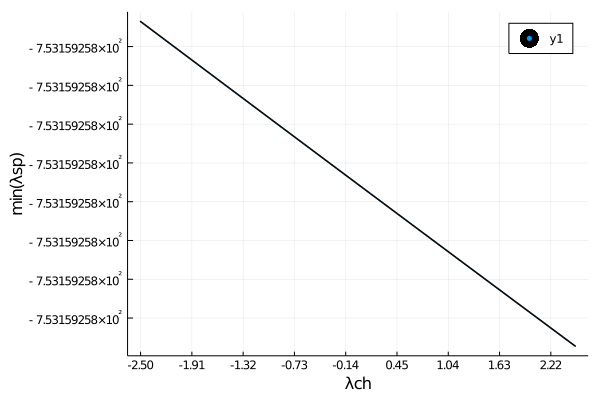

In [79]:
using Plots
#plot(λch_range[1:end], spOfch_max_int[1:end], xlabel="λch", ylabel="max(λsp)", xticks = λch_range[1:250:end],seriestype = :scatter, markersize=0.8)
plot(λch_range[1:end], spOfch_max_nl[1:end], xlabel="λch", ylabel="min(λsp)", xticks = λch_range[1:59:end],seriestype = :scatter, markersize=0.8)
#savefig("max_lambdasp_of_lambdach.pdf")

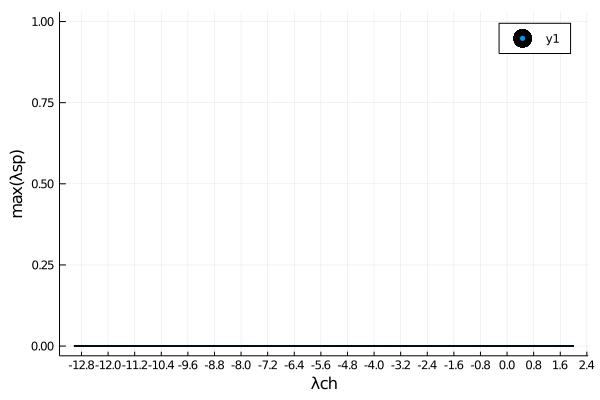

In [34]:
plot(λch_range[300:1800], spOfch_max_int[300:1800], xlabel="λch", ylabel="max(λsp)", xticks = λch_range[1:80:end],seriestype = :scatter, markersize=0.8)

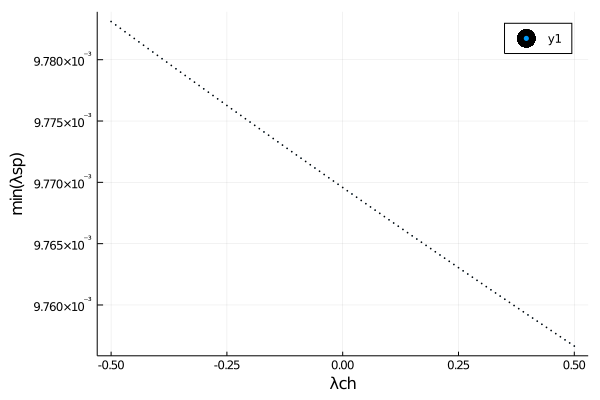

In [10]:
plot(λch_range[1:end], spOfch_min_int[1:end], xlabel="λch", ylabel="min(λsp)", xticks = λch_range[1:25:end],seriestype = :scatter, markersize=0.8)
#savefig("min_lambdasp_of_lambdach.pdf")

In [65]:
nh       = ceil(Int64, size(usable_ω,1)/2)
χsp_min    = -minimum(real.(1 ./ χsp[usable_ω[nh],:]))
χch_min    = -minimum(real.(1 ./ χch[usable_ω[nh],:]))
println("χsp_min: $(χsp_min)\nχch_min: $(χch_min)")

χsp_min: 0.09308725343569026
χch_min: -14.473154939042681


In [66]:
Xsp = @interval(-2,2)
Xch = @interval(-20,1)
λsp_range = -1:0.02:1
resi = zeros(size(λsp_range))
resi2 = zeros(size(λsp_range))
rχ_sp = real.(χsp[usable_ω,:])
rχ_ch = real.(χch[usable_ω,:])
for (λi,λsp) in enumerate(λsp_range)
    testf(λch) = construct_f(λsp, λch, rχ_sp, rχ_ch, qMultiplicity, rhs=real(χLocsp + χLocch))
    res_internal = roots(testf, Xch, Newton, 1e-8)
    max_int = maximum(interval.(res_internal))
    min_int = minimum(interval.(res_internal))
    resi[λi] = mid(max_int)
    resi2[λi] = mid(min_int)
    print("\r", λi, " of ", length(λsp_range))
end

101 of 101

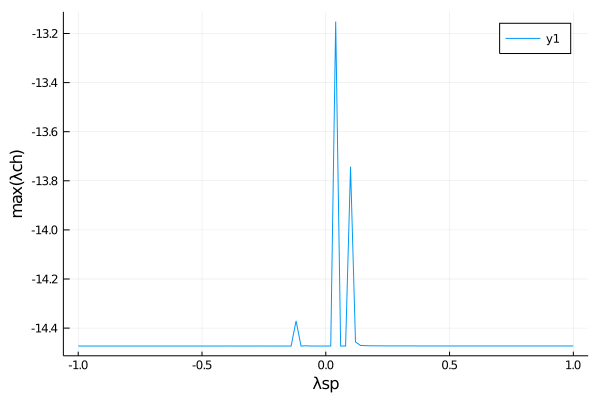

In [67]:
plot(λsp_range[1:end], resi[1:end], xlabel="λsp", ylabel="max(λch)")
#savefig("max_lambdach_of_lambdasp.pdf")

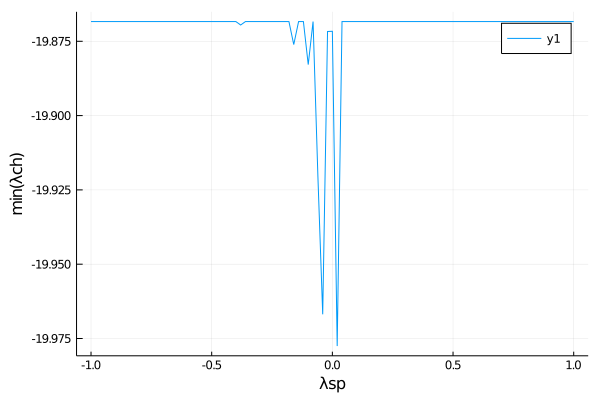

In [68]:
plot(λsp_range[1:end], resi2[1:end], xlabel="λsp", ylabel="min(λch)")
#savefig("min_lambdach_of_lambdasp.pdf")

In [69]:
res2 = interval.(res)
res3 = mid.(res2)
res4 = map(x -> [x[1], x[2]], res3)
res5 = collect(transpose(hcat(res4...)));

BoundsError: BoundsError

In [70]:
λch_range2 = -0.6:0.01:0.6
λsp_range2 = -0.5:0.01:0.5
res2 = zeros(length(λch_range2), length(λsp_range2))
ωrange = intersect(usable_ch, usable_sp)

for (i,λch_i) in enumerate(λch_range2)
    for (j,λsp_i) in enumerate(λsp_range2)
        res2[i,j] = construct_f( (λch_i, λsp_i),χch[ωrange,:], χsp[ωrange,:])  
    end
end

MethodError: MethodError: no method matching construct_f(::Tuple{Float64,Float64}, ::Array{Complex{Float64},2}, ::Array{Complex{Float64},2})
Closest candidates are:
  construct_f(::Any, ::Any, ::Any, !Matched::Any, !Matched::Any; rhs) at In[21]:18

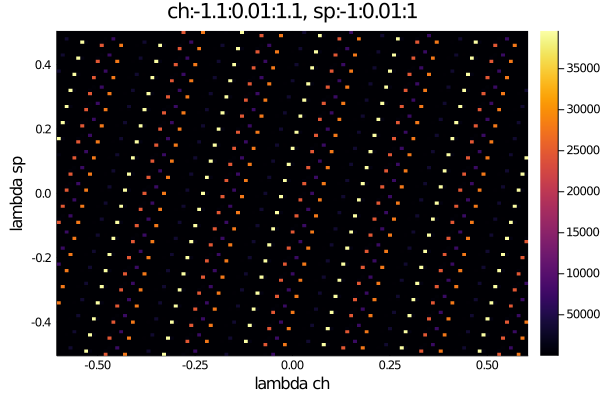

In [217]:
heatmap(λch_range2, λsp_range2, (res2 .- 0).^4, xlabel = "lambda ch", ylabel = "lambda sp", title="ch:-1.1:0.01:1.1, sp:-1:0.01:1")

In [349]:
χ_min_ch    = -minimum(1 ./ real.(χch[ceil(Int64,size(χch,1)/2),:]))
χ_min_sp    = -minimum(1 ./ real.(χsp[ceil(Int64,size(χch,1)/2),:]))
println(χ_min_ch, ", ", χ_min_sp)

-14.473154939042681, 0.09308725343569026


In [375]:
Xint = 0..1.1
fsp(λsp) =  construct_f(0.0, λsp, χch[ωrange,:], χsp[ωrange,:], qMultiplicity, rhs = rhs)
res_sp = IntervalRootFinding.roots(fsp, Xint, Newton, 1e-5)  
println(sort(interval.(res_sp)))
println(maximum(interval.(res_sp)))

Interval{Float64}[[0.0103389, 0.010339], [0.0143941, 0.0144021], [0.0225144, 0.0225147], [0.0236029, 0.023608], [0.0289026, 0.0289106], [0.0387014, 0.0387016], [0.049588, 0.0495966], [0.0626939, 0.062694], [0.0709535, 0.0709617], [0.0833816, 0.0833819], [0.0930821, 0.0930906], [0.0952014, 0.0952076]]
[0.0952014, 0.0952076]


In [377]:
Xint = (χ_min_ch-0.5)..(χ_min_ch+0.5)
χ_min_ch = -minimum(1 ./ real.(χch[floor(Int64,size(χch,1)/2),:]))
fch(λch) =  construct_f(λch, 0.0, χch[ωrange,:], χsp[ωrange,:], qMultiplicity, rhs = rhs)
res_ch = IntervalRootFinding.roots(fch, Xint)  
println(sort(interval.(res_ch)))
println(maximum(interval.(res_ch)))

Interval{Float64}[[227.512, 227.513], [227.514, 227.515]]
[227.514, 227.515]


In [333]:
Xint = -2..2
λch_range = -15:0.1:-14
χ_min_ch    = -minimum(1 ./ real.(χch[floor(Int64,size(χch,1)/2),:]))
res = zeros(length(λch_range))
for (i,λch_i) in enumerate(-15:0.1:-14)
    fsp_int(λsp) =  construct_f(λch_i, λsp, χch[ωrange,:], χsp[ωrange,:], qMultiplicity, rhs = rhs)
    res_sp = IntervalRootFinding.roots(fsp_int, Xint, Newton, 1e-3)
    res_sp_sort = sort(interval.(res_sp))
    println(res_sp_sort)
    res[i] = mid(maximum(interval.(res_sp)))
    println(i)
end

Interval{Float64}[[-0.656976, -0.65666], [-0.645462, -0.644907], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347508], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.30

Interval{Float64}[[-0.617177, -0.617105], [-0.614462, -0.614187], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.348871, -0.347909], [-0.34791, -0.347435], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.3

Interval{Float64}[[-0.615255, -0.614461], [-0.6068, -0.606756], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.348871, -0.347909], [-0.347414, -0.346933], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.30

Interval{Float64}[[-0.668343, -0.667733], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347527], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.305545, -0.304552], [-0.3

Interval{Float64}[[-0.709881, -0.709333], [-0.707951, -0.707624], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347586], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.3

Interval{Float64}[[-0.738249, -0.738186], [-0.42898, -0.427987], [-0.427988, -0.427488], [-0.415326, -0.414349], [-0.41435, -0.413358], [-0.413359, -0.412366], [-0.402512, -0.401519], [-0.40152, -0.400528], [-0.400529, -0.400028], [-0.400029, -0.399521], [-0.399522, -0.398529], [-0.388839, -0.387862], [-0.387863, -0.386916], [-0.386917, -0.385955], [-0.385956, -0.384994], [-0.381105, -0.380113], [-0.380114, -0.379167], [-0.379168, -0.378205], [-0.366491, -0.365499], [-0.364493, -0.363545], [-0.363546, -0.362584], [-0.362585, -0.361623], [-0.352838, -0.351861], [-0.351862, -0.350869], [-0.348871, -0.347909], [-0.34791, -0.347621], [-0.337033, -0.336041], [-0.336042, -0.335541], [-0.330136, -0.329159], [-0.32916, -0.328198], [-0.328199, -0.327221], [-0.322341, -0.321349], [-0.32135, -0.320372], [-0.320373, -0.319381], [-0.319382, -0.318389], [-0.315446, -0.314468], [-0.314469, -0.313477], [-0.313478, -0.312501], [-0.312502, -0.311509], [-0.31151, -0.310518], [-0.307544, -0.306551], [-0.3

In [334]:
res

11-element Array{Float64,1}:
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237
 0.09322727805996237

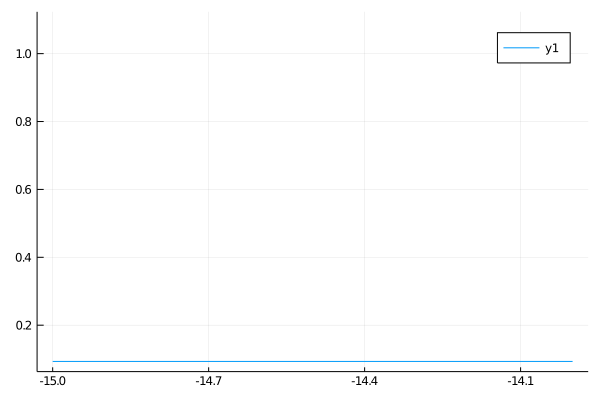

In [335]:
plot(λch_range, res)

In [310]:
Xint = -20..20
function f_full( (λch, λsp) ) 
    r = construct_f(λch, λsp, χch[ωrange,:], χsp[ωrange,:], qMultiplicity, rhs = rhs)
    return SVector(r,r)
end

function test( (λch, λsp) ) 
    r = λch + λsp
    return SVector(r,r)
end
    
res = IntervalRootFinding.roots(f_full, Xint × Xint, Newton, 1e-1)  
#println(sort(interval.(res)))
#println(maximum(interval.(res)))

InterruptException: InterruptException:

In [67]:
include("src/ladderDGA_Julia.jl")
include("test/loadFortranData.jl")

loadFortranData (generic function with 1 method)